In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix


plt.style.use('fivethirtyeight')

In [9]:
## Loading the data

ROOT_DIR = 'MNIST'

train_data = datasets.MNIST(
    root = ROOT_DIR,
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True   

)

test_data = datasets.MNIST(
    root = ROOT_DIR,
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True   

)


0.3%

100.0%


Extracting MNIST\MNIST\raw\train-images-idx3-ubyte.gz to MNIST\MNIST\raw



100.0%


Extracting MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\MNIST\raw



4.0%

100.0%


Extracting MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\MNIST\raw



100.0%

Extracting MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\MNIST\raw



In [10]:
train_data.data.dtype

torch.uint8

In [11]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<AxesSubplot:>

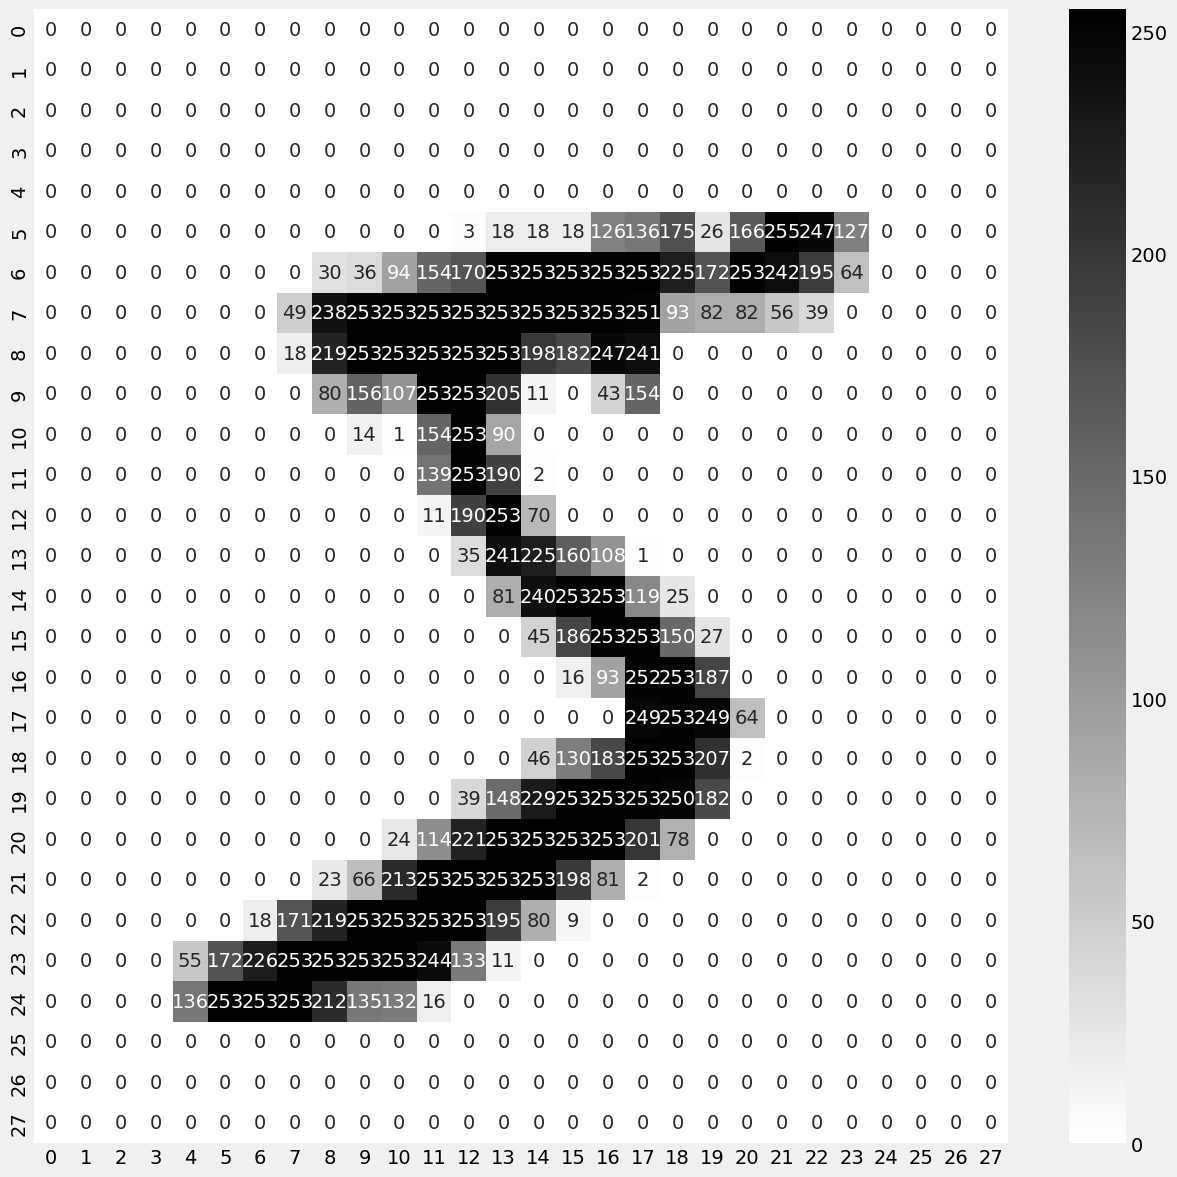

In [12]:

plt.figure(figsize=(14,14))
sns.heatmap(train_data.data[0], annot=True,cmap="binary", fmt='d')

In [13]:

train_data.data[0].shape

torch.Size([28, 28])

In [14]:
train_data.data[0].min().numpy(), train_data.data[0].max().numpy()

(array(0, dtype=uint8), array(255, dtype=uint8))

In [15]:

train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [16]:
train_data.targets.dtype

torch.int64

In [17]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [18]:

test_data.data.shape

torch.Size([10000, 28, 28])

In [20]:
BATCH=128

train_data_loader = DataLoader(dataset=train_data,
                              batch_size=BATCH,
                              shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                             batch_size=BATCH)

In [21]:

for x in test_data_loader:
    print(x[0].shape)
    print(x[1].shape)    
    break


torch.Size([128, 1, 28, 28])
torch.Size([128])


In [22]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cpu'

In [23]:
# Lets define the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, out_)
        )
        
    def forward(self, x):
        return self.layers(x)

In [24]:
model = NeuralNetwork(784, 10)#28*28==>784,outputs=10

model.to(DEVICE)

model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [25]:
model.parameters()

<generator object Module.parameters at 0x000001FA483244F8>

In [26]:
CE_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [27]:
## Training loop
EPOCHS = 10
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)
        
        optimizer.zero_grad()
        
        y_pred = model(x.reshape(-1, 784))
        
        loss = CE_loss(y_pred, y)
        
        loss_.append(loss.item())
        loss.backward()
        optimizer.step()
        
        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)
        
        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/10
   Batch: 0, Loss: 2.3013 Accuracy 0.1562
   Batch: 100, Loss: 0.3849 Accuracy 0.8906
   Batch: 200, Loss: 0.2638 Accuracy 0.9141
   Batch: 300, Loss: 0.2000 Accuracy 0.9375
   Batch: 400, Loss: 0.2780 Accuracy 0.9297
Epoch: 2/10
   Batch: 0, Loss: 0.1452 Accuracy 0.9453
   Batch: 100, Loss: 0.1872 Accuracy 0.9375
   Batch: 200, Loss: 0.0734 Accuracy 0.9766
   Batch: 300, Loss: 0.0495 Accuracy 0.9922
   Batch: 400, Loss: 0.1151 Accuracy 0.9688
Epoch: 3/10
   Batch: 0, Loss: 0.1990 Accuracy 0.9297
   Batch: 100, Loss: 0.0699 Accuracy 0.9766
   Batch: 200, Loss: 0.0337 Accuracy 1.0000
   Batch: 300, Loss: 0.0232 Accuracy 1.0000
   Batch: 400, Loss: 0.1418 Accuracy 0.9453
Epoch: 4/10
   Batch: 0, Loss: 0.0238 Accuracy 0.9922
   Batch: 100, Loss: 0.0854 Accuracy 0.9688
   Batch: 200, Loss: 0.1268 Accuracy 0.9531
   Batch: 300, Loss: 0.0626 Accuracy 0.9766
   Batch: 400, Loss: 0.0544 Accuracy 0.9766
Epoch: 5/10
   Batch: 0, Loss: 0.0880 Accuracy 0.9688
   Batch: 100, Loss: 0.024

<AxesSubplot:>

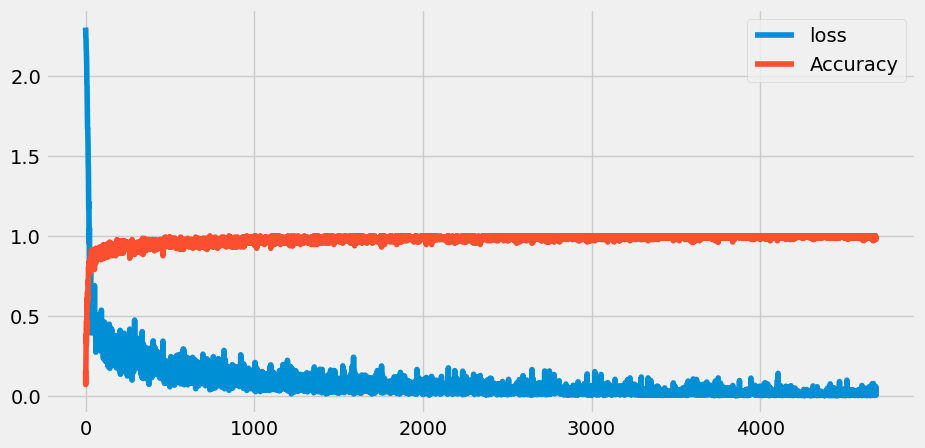

In [28]:
# plot the Train acc and loss
# plt.figure(figsize=(14,14))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [29]:
# testing over the test data

test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [30]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.0893, test accuracy: 0.9760


In [32]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))     

In [33]:
cm = confusion_matrix(target, pred)

In [35]:
cm

array([[ 970,    0,    3,    0,    1,    1,    2,    1,    1,    1],
       [   0, 1119,    3,    0,    0,    0,    2,    1,   10,    0],
       [   3,    0, 1013,    1,    4,    0,    2,    3,    6,    0],
       [   0,    0,   10,  983,    0,    3,    0,    6,    6,    2],
       [   1,    1,    2,    0,  973,    1,    1,    1,    0,    2],
       [   2,    0,    0,   13,    3,  856,    6,    2,    6,    4],
       [   2,    2,    1,    1,   13,    1,  934,    0,    4,    0],
       [   1,    3,   10,    2,    2,    0,    0, 1005,    2,    3],
       [   7,    0,    6,    3,    4,    5,    3,    2,  942,    2],
       [   2,    3,    0,    5,   15,    6,    0,   11,    5,  962]],
      dtype=int64)

<AxesSubplot:>

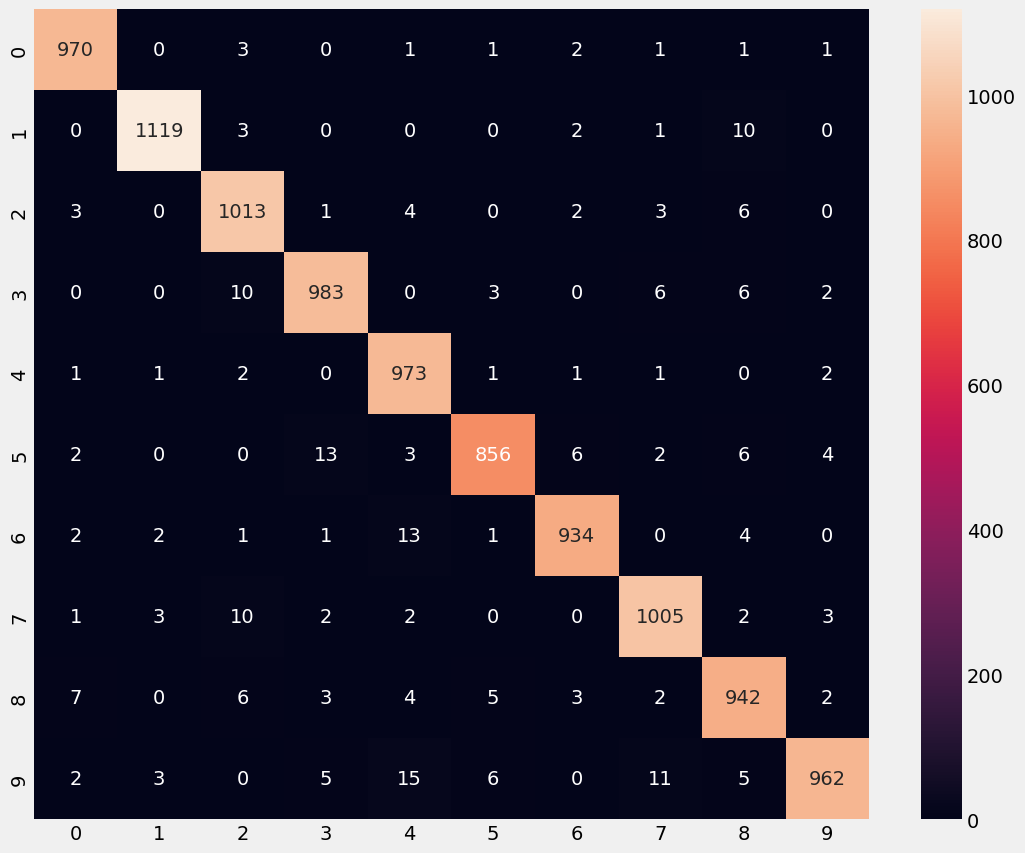

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')